<a href="https://colab.research.google.com/github/FatimaBatool820/Assignment_02_PAI/blob/main/Assignment2_Full_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment_02:**
[https://www.sciencedirect.com/science/article/pii/S2772442522000235]

# **Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier #imbalanced dataset
from sklearn.ensemble import BaggingClassifier #balanced dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score,auc,f1_score

# **Data Understanding**

In [ ]:
heart=pd.read_csv('framingham.csv')

In [ ]:
heart.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


# **Data Imputation**

In [ ]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Fill missing values with the median for numerical columns
for col in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
  heart[col] = heart[col].fillna(heart[col].median())

# Fill missing values with the mode for categorical columns
for col in ['education', 'BPMeds']:
  heart[col] = heart[col].fillna(heart[col].mode()[0])

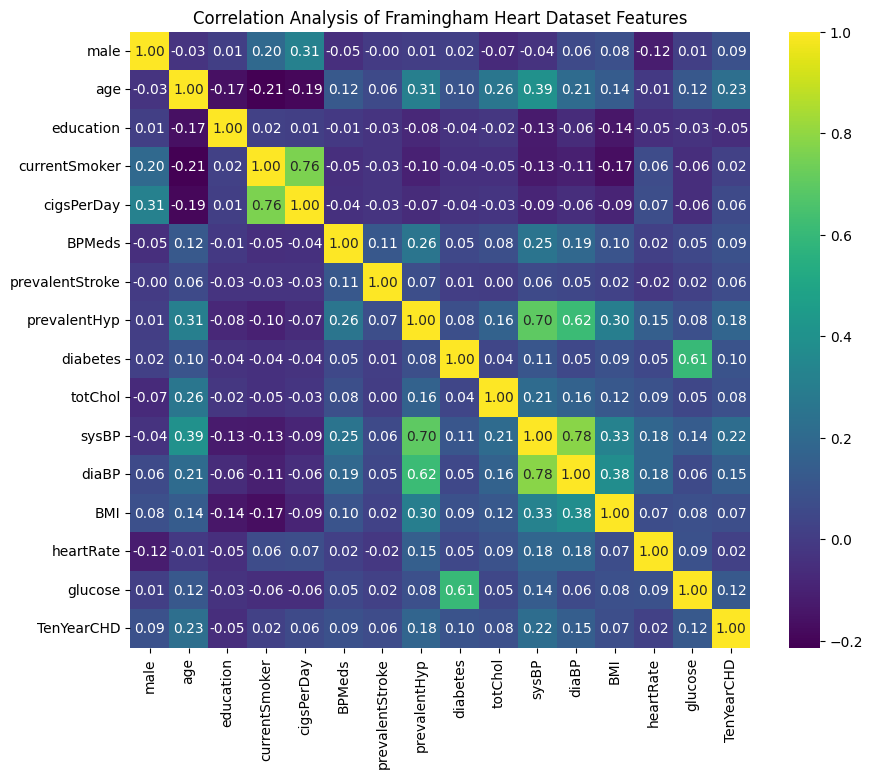

In [ ]:
# Select only numerical columns for correlation analysis
numerical_features = heart.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')

# Add titles and labels
plt.title('Correlation Analysis of Framingham Heart Dataset Features')
plt.show()

In [ ]:
heart.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


# **Data Balancing**

In [ ]:
heart['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3596
1,644


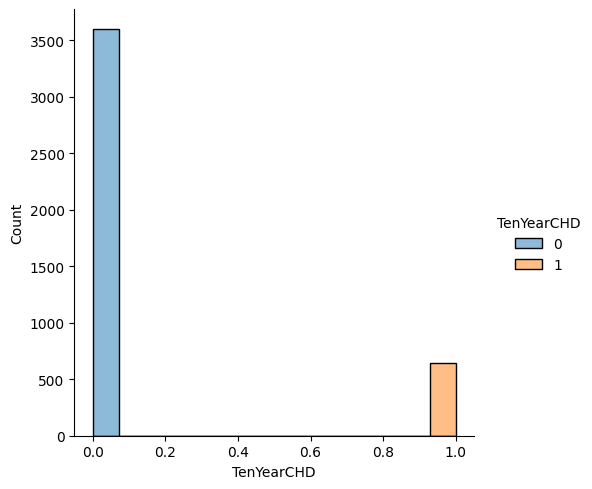

In [ ]:
sns.displot(heart, x="TenYearCHD", hue='TenYearCHD')

# **Random Forest Implementation**

*   # **SMOTE Technique**
Oversamples minority class

In [ ]:
X = heart.drop('TenYearCHD', axis=1)
y = heart['TenYearCHD']

# 1. Split your dataset 80%-20%
#Random State: ensures same split every time
#stratify: keeps same proportion of 0s & 1s in boths sets(Training & Test class)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #stratify=y mean ytrain & ytest

# 2. Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Define the Random Forest
#n_estimators means no. of trees
#random state means generate same results everytime
clf=RandomForestClassifier(n_estimators=100, random_state=42)

# 4. Fit the classifier on resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# 5. Predict labels from test features
y_pred = clf.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy_RF:.2f}")

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Support: Number of true instances for each class.
print("Classification Report:\n",classification_report(y_test, y_pred))


Model Accuracy: 0.81
Balanced Accuracy: 0.52
F1 Score: 0.13
Confusion Matrix:
[[679  40]
 [117  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.90       719
           1       0.23      0.09      0.13       129

    accuracy                           0.81       848
   macro avg       0.54      0.52      0.51       848
weighted avg       0.76      0.81      0.78       848



In [ ]:
#[:, 1] selects the probabilities of the positive class for all samples.
y_proba = clf.predict_proba(X_test)[:, 1]

# 2. Compute AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.61


*   # **Balanced Bagging Technique Random Forest**
Undersamples majority class



In [ ]:
X = heart.drop(['TenYearCHD'], axis=1)
y = heart['TenYearCHD']

#Split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply RF+BBC
RF = RandomForestClassifier(n_estimators=100, random_state=42)

#replacement: each sample is picked only once
#sampling_strategy undersampling majority class
bbc = BalancedBaggingClassifier(RF,sampling_strategy='auto',replacement=False, random_state=42,n_estimators=10)
bbc.fit(X_train, y_train)

#Predict
y_pred = bbc.predict(X_test)

#Accuracy
accuracy_RF = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy_RF:.2f}")

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Support: Number of true instances for each class.
print("Classification Report:\n",classification_report(y_test, y_pred))


Model Accuracy: 0.69
Balanced Accuracy: 0.61
F1 Score: 0.32
Confusion Matrix:
[[528 197]
 [ 63  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       725
           1       0.23      0.49      0.32       123

    accuracy                           0.69       848
   macro avg       0.56      0.61      0.56       848
weighted avg       0.80      0.69      0.73       848



In [ ]:
# 1. Get predicted probabilities from the classifier (only positive class)
y_proba = clf.predict_proba(X_test)[:, 1]

# 2. Compute AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.97


# **Balanced Data**

In [ ]:
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts(normalize=True))


After SMOTE:
TenYearCHD
0    0.5
1    0.5
Name: proportion, dtype: float64


# **Experimental Tracking_RF**

In [ ]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Replace with your MLflow URI
mlflow.set_experiment("Random_Forest Experiment")

# Start an MLflow run
with mlflow.start_run():

    # Log parameters related to Random Forest model
    mlflow.log_param("model", "Random Forest")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)  # If you want to log max_depth as a parameter
    mlflow.log_param("random_state", 42)

    # Train the model
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_RF)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    f1 = f1_score(y_test, y_pred)
    mlflow.log_metric("f1_score", f1)
    #mlflow.log_metric("roc_auc", roc_auc)

    # Log the trained model
    mlflow.sklearn.log_model(rf_model, "Random_Forest_Model")

    print("Random Forest model and metrics logged in MLflow")

# **KNN Implementation**

In [ ]:
X = heart.drop(['TenYearCHD'], axis=1)
y = heart['TenYearCHD']

#Split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply KNN+BBC
knn = KNeighborsClassifier(n_neighbors=5)
bbc = BalancedBaggingClassifier(knn,sampling_strategy='auto',replacement=False, random_state=42,n_estimators=10)

In [ ]:
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
#Accuracy
accuracy_KNN = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy_KNN:.2f}")

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Support: Number of true instances for each class.
print("Classification Report:\n",classification_report(y_test, y_pred))


Model Accuracy: 0.64
Balanced Accuracy: 0.58
F1 Score: 0.29
Confusion Matrix:
[[482 243]
 [ 61  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       725
           1       0.20      0.50      0.29       123

    accuracy                           0.64       848
   macro avg       0.55      0.58      0.52       848
weighted avg       0.79      0.64      0.69       848



In [ ]:
# 1. Get predicted probabilities from the classifier (only positive class)
y_proba = bbc.predict_proba(X_test)[:, 1]

# 2. Compute AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.61


# **Experimental Tracking_KNN**

In [ ]:
import mlflow
import mlflow.sklearn
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Set up tracking URI and experiment name
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Correct URI without the duplicate "http"
mlflow.set_experiment("KNearest_Neighbour Experiment")

# Start the run
with mlflow.start_run() as run:
    #print(f"Run ID: {run.info.run_id}")

    # Initialize KNN and BalancedBaggingClassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    bbc = BalancedBaggingClassifier(estimator=knn, sampling_strategy='auto', replacement=False, random_state=42, n_estimators=10)

    # Fit the model
    bbc.fit(X_train, y_train)
    y_pred = bbc.predict(X_test)

    # Calculate accuracy
    accuracy_KNN = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy_KNN:.2f}")

    f1 = f1_score(y_test, y_pred)
    print(f"\nF1-Score:",f1)

    # Log parameters
    mlflow.log_param("model", "KNN + Balanced Bagging Classifier")
    mlflow.log_param("n_neighbors", 5)
    mlflow.log_param("n_estimators", 10)
    mlflow.log_param("sampling_strategy", 'auto')

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_KNN)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    f1 = f1_score(y_test, y_pred)
    mlflow.log_metric("f1_score", f1)

    #print(f"Balanced Accuracy: {balanced_accuracy}")

# **Decision Tree Implementation**

In [ ]:
X = heart.drop(['TenYearCHD'], axis=1)
y = heart['TenYearCHD']

#Split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply DT+BBC
DT = DecisionTreeClassifier(random_state=42)
bbc = BalancedBaggingClassifier(DT,sampling_strategy='auto',replacement=False, random_state=42,n_estimators=10)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)

#Accuracy
accuracy_DT = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy_DT:.2f}")

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Support: Number of true instances for each class.
print("Classification Report:\n",classification_report(y_test, y_pred))


Model Accuracy: 0.72
Balanced Accuracy: 0.58
F1 Score: 0.29
Confusion Matrix:
[[564 161]
 [ 75  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       725
           1       0.23      0.39      0.29       123

    accuracy                           0.72       848
   macro avg       0.56      0.58      0.56       848
weighted avg       0.79      0.72      0.75       848



In [ ]:
# 1. Get predicted probabilities from the classifier (only positive class)
y_proba = bbc.predict_proba(X_test)[:, 1]

# 2. Compute AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.63


# **Experimental Tracking_Decision Tree**

In [ ]:
import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Replace with your MLflow URI
mlflow.set_experiment("Decision_Tree Experiment")

with mlflow.start_run():

    # Train the model
    bbc.fit(X_train, y_train)

    # Make predictions
    y_pred = bbc.predict(X_test)

    # Accuracy
    accuracy_DT = accuracy_score(y_test, y_pred)
    print(f"\nModel Accuracy: {accuracy_DT:.2f}")
    mlflow.log_metric("accuracy", accuracy_DT)

    # Calculate balanced accuracy
    score = balanced_accuracy_score(y_test, y_pred)
    print("Balanced Accuracy:", score)
    mlflow.log_metric("balanced_accuracy", score)


    #F1-Score
    f1 = f1_score(y_test, y_pred)
    mlflow.log_metric("f1_score", f1)

    # Log model and parameters
    mlflow.log_param("model", "Decision Tree + Balanced Bagging Classifier")
    mlflow.log_param("n_estimators", 10)
    mlflow.log_param("sampling_strategy", "auto")
    mlflow.log_param("random_state", 42)

    # Confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Log confusion matrix and classification report as artifacts (optional)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix')
    cm_fig_path = "confusion_matrix.png"
    plt.savefig(cm_fig_path)
    mlflow.log_artifact(cm_fig_path)

    # Log the model
    mlflow.sklearn.log_model(bbc, "Balanced_Bagging_Model")

    print("DT + BBC model and metrics logged in MLflow")

# **Comparsion of Models**

<ipython-input-46-cdd8b2ce176e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=data, palette='Set2')


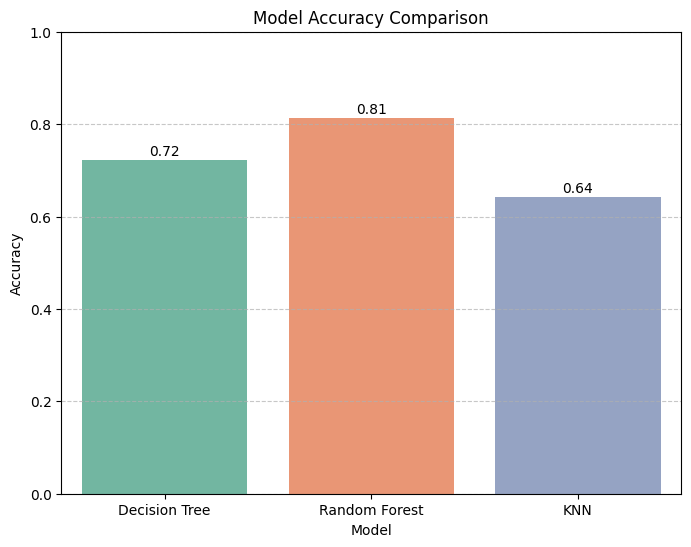

In [ ]:
# Create a DataFrame
data = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [accuracy_DT, accuracy_RF, accuracy_KNN]
})

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=data, palette='Set2')

# Annotate
for index, row in data.iterrows():
    plt.text(index, row.Accuracy + 0.01, f'{row.Accuracy:.2f}', ha='center')

plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Mlflow Comparsion Chart**

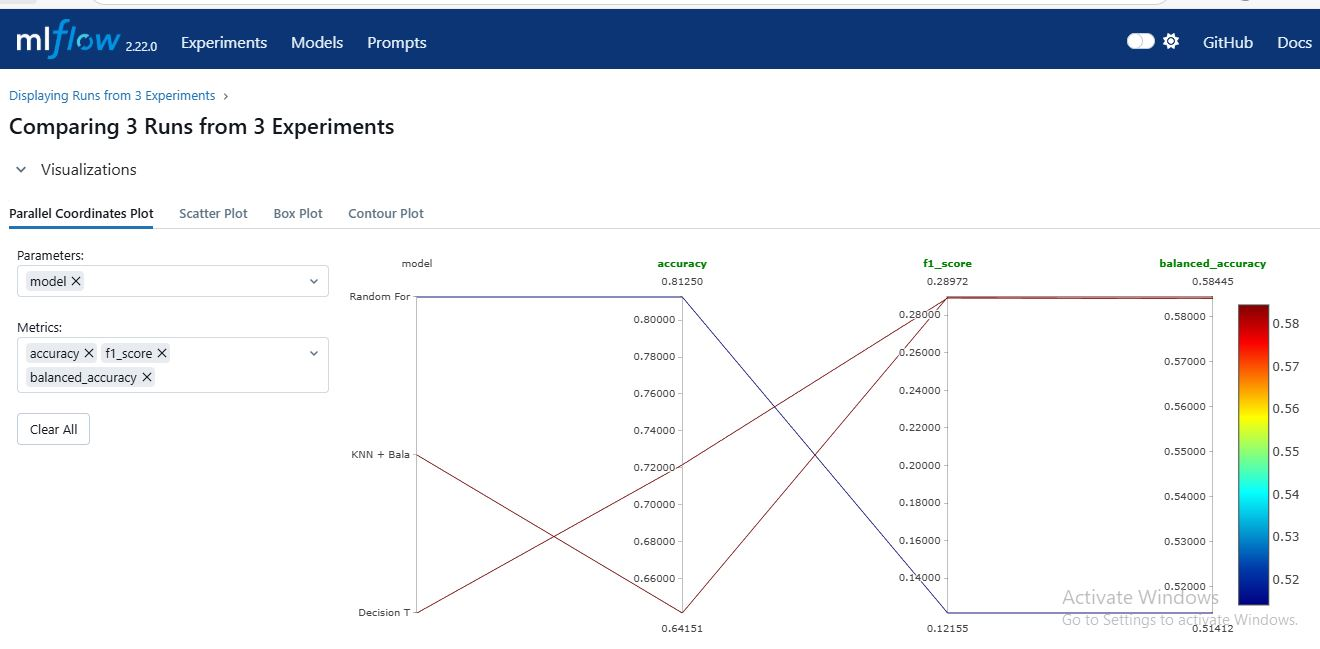

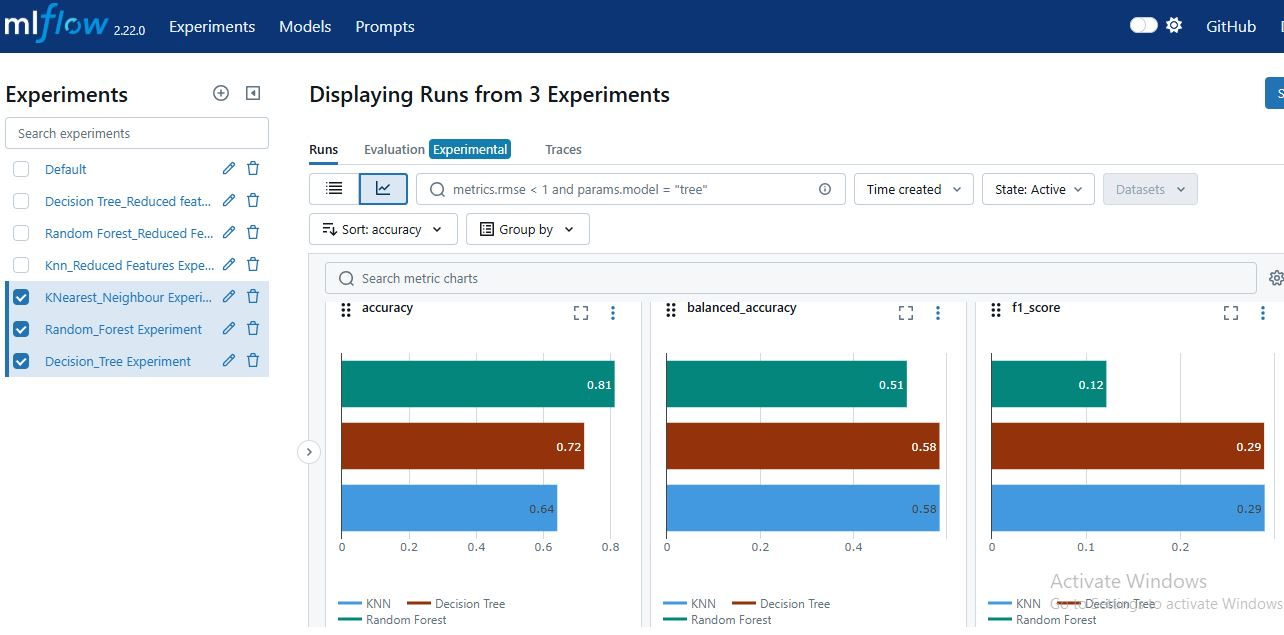

# **Reasoning:**
Models demonstrate significantly higher accuracy with Random Forest Tree and Decision, the F1-scores and balanced accuracy are relatively lower. Due to the nature of the imbalanced dataset, where accuracy alone can be misleading. Unlike the paper's approach, which involved dropping rows with missing values and using random sampling, I employed a more robust data preprocessing pipeline imputing missing values (median/mode). The use of SMOTE and ensemble techniques like Balanced Bagging introduced synthetic samples, which led the models to be more cautious in predicting the minority class, hence slightly lower F1-scores and balanced accuracy. This trade-off reflects a clinically important bias toward reducing false positives, which is often preferable in healthcare settings.
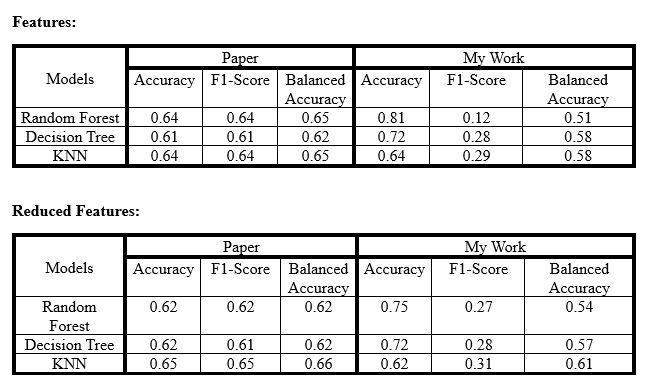